In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
df.columns

Index(['Unnamed: 0', 'region', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'month',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
#sns.pairplot(df)

## Correlation Heatmap


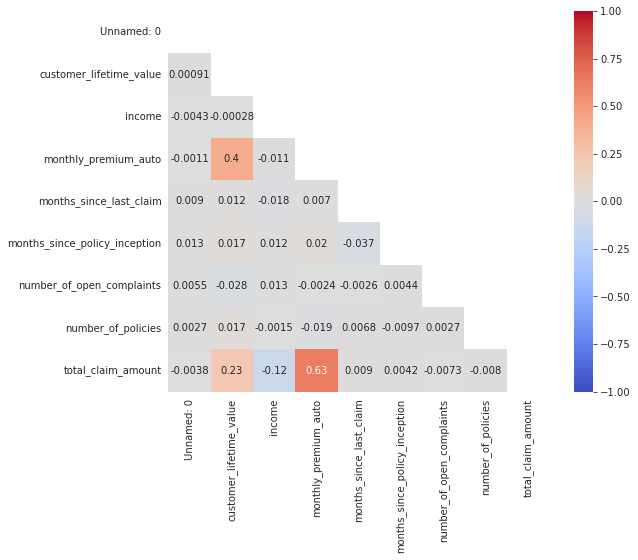

In [6]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [7]:
corr_matrix=df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
drop_col = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10689 non-null  int64 
 1   region                         10689 non-null  object
 2   customer_lifetime_value        10689 non-null  int64 
 3   response                       10689 non-null  object
 4   coverage                       10689 non-null  object
 5   education                      10689 non-null  object
 6   effective_to_date              10689 non-null  object
 7   month                          10689 non-null  object
 8   employment_status              10689 non-null  object
 9   gender                         10689 non-null  object
 10  income                         10689 non-null  int64 
 11  location_code                  10689 non-null  object
 12  marital_status                 10689 non-null  object
 13  m

In [9]:
df.drop(drop_col,\
           axis=1,inplace=True)

In [10]:
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

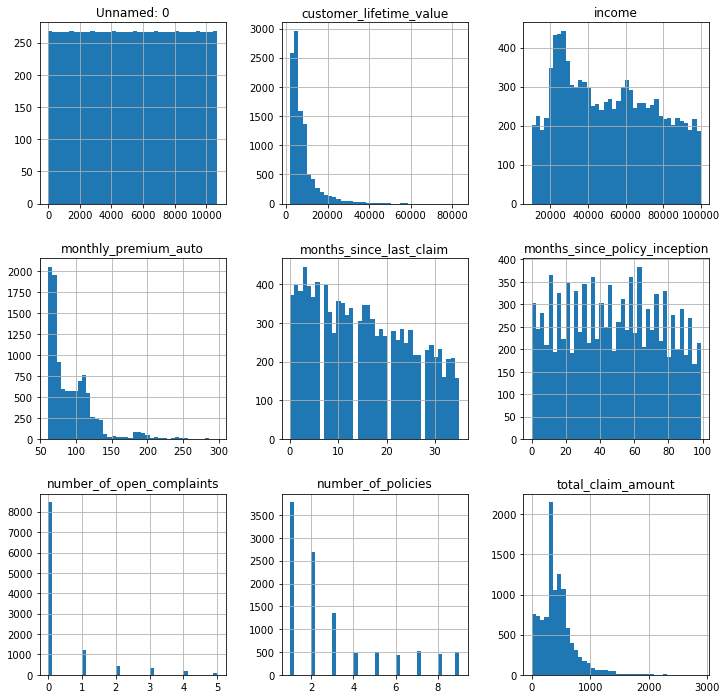

In [11]:
df.select_dtypes('int').hist(figsize=(12,12), bins=40)

## Transforming to normal distribution (using QuantileTransformer)

In [12]:
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


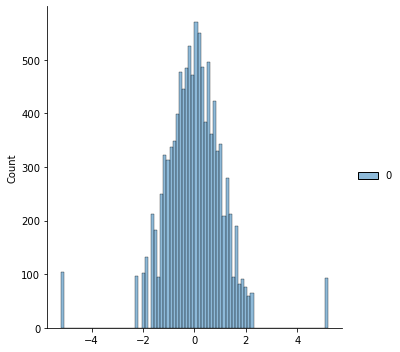

In [13]:
## months_since_policy_inception

pt = PowerTransformer()
qt = QuantileTransformer(output_distribution="normal")
months_since_policy_inception_transformed=qt.fit_transform(df['months_since_policy_inception'].to_numpy().reshape(-1,1))
sns.displot(months_since_policy_inception_transformed)

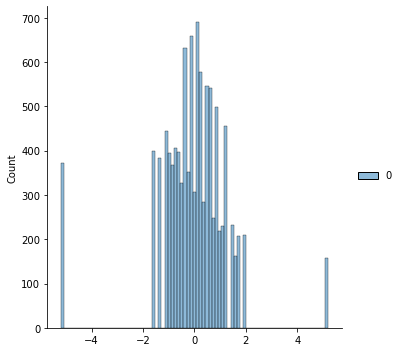

In [14]:
## months_since_last_claim

months_since_last_claim_transformed=qt.fit_transform(df['months_since_last_claim'].to_numpy().reshape(-1,1))
sns.displot(months_since_last_claim_transformed)

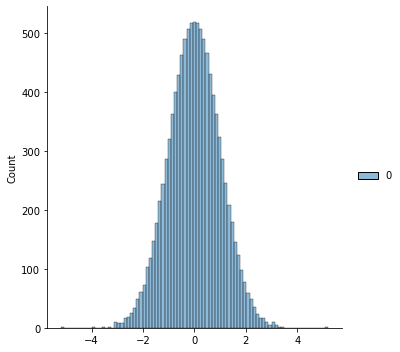

In [15]:
## customer_lifetime_value_transformed
customer_lifetime_value_transformed=qt.fit_transform(df['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(customer_lifetime_value_transformed)

In [16]:
## total_claim_amount
#total_claim_amount_transformed=pt.fit_transform(df['total_claim_amount'].to_numpy().reshape(-1,1))
#sns.displot(total_claim_amount_transformed)



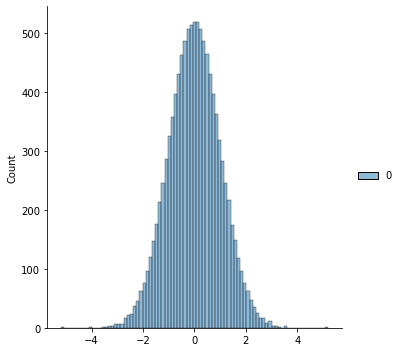

In [17]:
##income using QuantileTransformer


income_transformed=qt.fit_transform(df['income'].to_numpy().reshape(-1,1))
sns.displot(income_transformed)

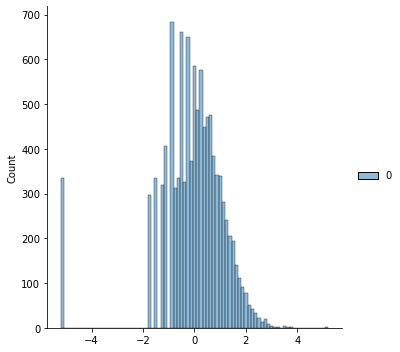

In [18]:
## monthly premium auto
monthly_premium_auto_transformed=qt.fit_transform(df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly_premium_auto_transformed)


In [19]:
df.select_dtypes('int').columns

Index(['Unnamed: 0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

In [20]:
transformed_cols = ['months_since_last_claim_transformed', 'months_since_policy_inception_transformed', 
'monthly_premium_auto_transformed', 'income_transformed', 
'customer_lifetime_value_transformed']
#  'number_of_policies_transformed', 'number_of_open_complaints_transformed'


df["months_since_last_claim_transformed"]= months_since_last_claim_transformed
df.drop(["months_since_last_claim"],axis=1,inplace=True)


df["months_since_policy_inception_transformed"]= months_since_policy_inception_transformed
df.drop(["months_since_policy_inception"],axis=1,inplace=True)


df["monthly_premium_auto_transformed"]= monthly_premium_auto_transformed
df.drop(["monthly_premium_auto"],axis=1,inplace=True)

df["income_transformed"]= income_transformed
df.drop(["income"],axis=1,inplace=True)


df["customer_lifetime_value_transformed"]= customer_lifetime_value_transformed
df.drop(["customer_lifetime_value"],axis=1,inplace=True)

#df["number_of_policies_transformed"]= number_of_policies_transformed
#df.drop(["number_of_policies"],axis=1,inplace=True)

# df["number_of_open_complaints_transformed"]= number_of_open_complaints_transformed
#df.drop(["number_of_open_complaints"],axis=1,inplace=True)

In [21]:
df

,Unnamed: 0,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed
0,0,central,no,basic,college,2/18/11,feb,employed,m,suburban,...,offer3,agent,292,four-door car,medsize,-0.590949,0.109365,-5.199338,-0.058675,-0.395505
1,1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,...,offer4,call center,744,four-door car,medsize,-1.132898,-0.624145,-1.250242,-0.794461,-2.351750
2,2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,...,offer3,call center,480,suv,medsize,1.968165,-0.464007,0.393847,-1.150034,1.239030
3,3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,...,offer2,branch,484,four-door car,medsize,-0.334851,-1.817968,0.329548,-0.027837,1.674186
4,4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,...,offer1,branch,707,four-door car,medsize,0.062770,-0.464007,0.993800,-1.018358,0.681761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,...,offer3,web,1214,luxury car,medsize,-0.492137,-0.211070,2.583110,0.439976,1.288971
10685,10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,...,offer2,branch,273,four-door car,medsize,-0.590949,0.567211,-1.081940,0.323079,-0.196025
10686,10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,...,offer1,web,381,luxury suv,medsize,-0.248427,0.423855,2.119668,-0.282602,1.751677
10687,10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,...,offer1,branch,618,suv,medsize,-5.199338,-0.593940,1.620664,0.421059,0.992889


## Transforming number_of_open_complaints and number_of_policies to Object

In [22]:
categoricals_features=df.select_dtypes("object")
categoricals_features

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


## remove outliers

In [23]:
print(transformed_cols)

df

['months_since_last_claim_transformed', 'months_since_policy_inception_transformed', 'monthly_premium_auto_transformed', 'income_transformed', 'customer_lifetime_value_transformed']


,Unnamed: 0,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed
0,0,central,no,basic,college,2/18/11,feb,employed,m,suburban,...,offer3,agent,292,four-door car,medsize,-0.590949,0.109365,-5.199338,-0.058675,-0.395505
1,1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,...,offer4,call center,744,four-door car,medsize,-1.132898,-0.624145,-1.250242,-0.794461,-2.351750
2,2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,...,offer3,call center,480,suv,medsize,1.968165,-0.464007,0.393847,-1.150034,1.239030
3,3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,...,offer2,branch,484,four-door car,medsize,-0.334851,-1.817968,0.329548,-0.027837,1.674186
4,4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,...,offer1,branch,707,four-door car,medsize,0.062770,-0.464007,0.993800,-1.018358,0.681761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,...,offer3,web,1214,luxury car,medsize,-0.492137,-0.211070,2.583110,0.439976,1.288971
10685,10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,...,offer2,branch,273,four-door car,medsize,-0.590949,0.567211,-1.081940,0.323079,-0.196025
10686,10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,...,offer1,web,381,luxury suv,medsize,-0.248427,0.423855,2.119668,-0.282602,1.751677
10687,10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,...,offer1,branch,618,suv,medsize,-5.199338,-0.593940,1.620664,0.421059,0.992889


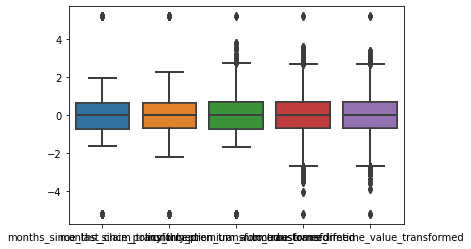

In [24]:
for i in transformed_cols:
    sns.boxplot(data=df[transformed_cols])

In [25]:
 before = df.shape

In [26]:

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-2*iqr
    fence_high = q3+2*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in transformed_cols: 
    df = remove_outlier(df, i )


(9642, 25)

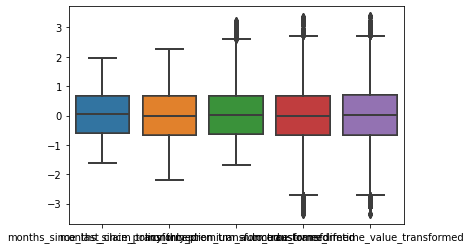

In [27]:
for i in transformed_cols:
    sns.boxplot(data=df[transformed_cols])
df.shape
    


In [28]:
9642/10689

0.9020488352511928

## Feature engineering

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

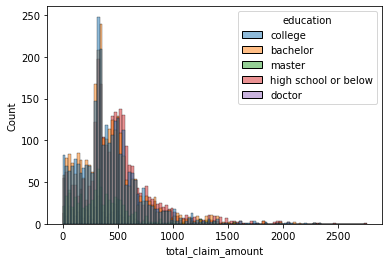

In [29]:
sns.histplot(data= df, x= 'total_claim_amount', hue='education')

In [30]:
#df['education'].value_counts()
#ed_transformer = {"to_highschool": 'high school or below', "bachelor_college" : ['bachelor', 'college'], "master_doctor": ['master', 'doctor']}

#df['education_transformed'] = df['education'].map(ed_transformer)
#df['education_transformed'].value_counts()

## One-hot encoding
 Also get nominal encoding
 Use sciekitlearn 

In [31]:
col_names_object = list(df.select_dtypes("object").columns)
col_names_object

['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [32]:
categoricals_features=pd.get_dummies(categoricals_features[col_names_object], drop_first=True)


In [33]:
list(categoricals_features.columns)

['region_east',
 'region_north west',
 'region_west region',
 'response_yes',
 'coverage_extended',
 'coverage_premium',
 'education_college',
 'education_doctor',
 'education_high school or below',
 'education_master',
 'effective_to_date_1/10/11',
 'effective_to_date_1/11/11',
 'effective_to_date_1/12/11',
 'effective_to_date_1/13/11',
 'effective_to_date_1/14/11',
 'effective_to_date_1/15/11',
 'effective_to_date_1/16/11',
 'effective_to_date_1/17/11',
 'effective_to_date_1/18/11',
 'effective_to_date_1/19/11',
 'effective_to_date_1/2/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/21/11',
 'effective_to_date_1/22/11',
 'effective_to_date_1/23/11',
 'effective_to_date_1/24/11',
 'effective_to_date_1/25/11',
 'effective_to_date_1/26/11',
 'effective_to_date_1/27/11',
 'effective_to_date_1/28/11',
 'effective_to_date_1/29/11',
 'effective_to_date_1/3/11',
 'effective_to_date_1/30/11',
 'effective_to_date_1/31/11',
 'effective_to_date_1/4/11',
 'effective_to_date_1/5/11',
 'ef

##  Split X-y   "total-claim-amount"

In [34]:
X=df.drop('total_claim_amount', axis=1)
y=df['total_claim_amount']

In [35]:
X=X._get_numeric_data()
X=X.drop(['Unnamed: 0'], axis = 1)

In [36]:
X.columns

Index(['number_of_open_complaints', 'number_of_policies',
       'months_since_last_claim_transformed',
       'months_since_policy_inception_transformed',
       'monthly_premium_auto_transformed', 'income_transformed',
       'customer_lifetime_value_transformed'],
      dtype='object')

In [37]:
X.describe()

,number_of_open_complaints,number_of_policies,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed
count,9642.000000,9642.000000,9642.000000,9642.000000,9642.000000,9642.000000,9642.000000
mean,0.388612,2.971479,0.041920,-0.002522,0.072089,-0.000320,0.022329
std,0.918574,2.395046,0.872456,0.935753,0.916384,0.999759,0.980392
min,0.000000,1.000000,-1.615945,-2.196894,-1.694923,-3.354270,-3.355141
25%,0.000000,1.000000,-0.590949,-0.653377,-0.621099,-0.678471,-0.671994
50%,0.000000,2.000000,0.062770,0.001255,0.033880,-0.002909,0.028160
75%,0.000000,4.000000,0.650274,0.661162,0.672129,0.680633,0.687043
max,5.000000,9.000000,1.968165,2.273052,3.224658,3.354623,3.379921


array([[<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'months_since_last_claim_transformed'}>],
       [<AxesSubplot:title={'center':'months_since_policy_inception_transformed'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto_transformed'}>,
        <AxesSubplot:title={'center':'income_transformed'}>],
       [<AxesSubplot:title={'center':'customer_lifetime_value_transformed'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

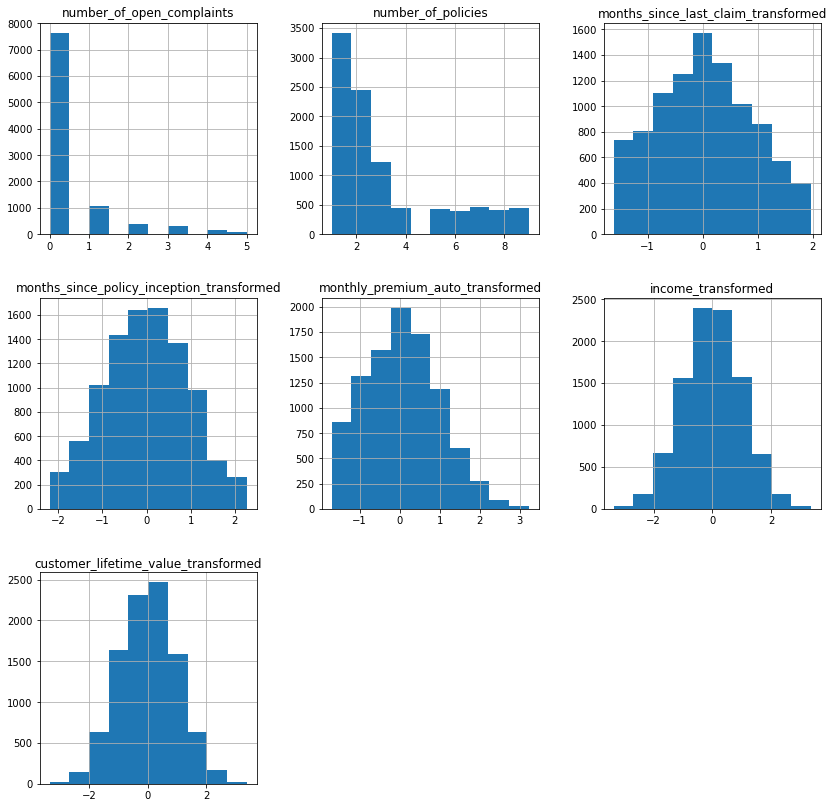

In [38]:
X.hist(figsize=(14,14))

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

## standardize

In [40]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train)

In [41]:
X_train.shape

(6749, 7)

In [42]:
X_test_scaled=std_scaler.transform(X_test)

In [43]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.42107637 -0.8254333   1.07345093 ...  1.71042228 -0.42773895
   0.11883888]
 [-0.42107637 -0.8254333  -1.3522492  ... -0.21833243  0.84878829
  -1.41313311]
 [-0.42107637 -0.8254333   0.88613403 ...  1.3591119  -0.51727811
  -0.23625653]
 ...
 [-0.42107637 -0.8254333   0.61224331 ... -0.97054799  2.2133949
  -1.31108676]
 [-0.42107637 -0.40882776  0.6993131  ... -0.7580213  -0.27422989
   0.45606895]
 [-0.42107637 -0.8254333  -1.15497267 ...  0.32432303 -0.248117
  -0.77171963]]
--------
[[-0.42107637  1.25759442 -0.43408553 ...  0.54480111 -0.06528596
   0.48969585]
 [ 4.99608799  0.00777779 -1.15497267 ...  1.0496573  -0.76077653
   0.35047561]
 [-0.42107637 -0.40882776 -0.24317086 ... -0.29590224 -0.17000897
   0.93508445]
 ...
 [-0.42107637 -0.8254333  -1.59430459 ...  0.6510744  -1.23185287
  -0.74942179]
 [ 3.91265512  1.25759442  1.57097834 ... -1.09885884 -0.33229734
  -0.41947266]
 [-0.42107637 -0.8254333  -1.3522492  ...  0.22338294  1.60001926
  -0.76379793]]


## Linear Regression

In [44]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     473.8
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        15:31:33   Log-Likelihood:                -46443.
No. Observations:                6749   AIC:                         9.290e+04
Df Residuals:                    6741   BIC:                         9.296e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        439.4172      2.871    153.072      0.0

In [45]:
predictions_test

array([522.72644958, 626.14561265, 387.17815773, ..., 602.65532248,
       268.5174872 , 424.46421767])

In [46]:
#display adjusted R-squared
print(model.rsquared_adj)

0.32905711017109773


In [47]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [48]:
model.coef_

array([ -0.82111473,  -2.31557371,   1.73276695,  -3.12939773,
       165.06998873, -36.34929961,  -9.11579342])

In [49]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [50]:
## new record 
#new_data=[2000,450,18,25]
#new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,4))
#np.array(np.array(new_data).reshape(-1,4)).shape

In [51]:
y_test

2578     508
8598     566
4517     355
1592     689
10531    420
        ... 
8913      24
7128     817
2796     666
6572     316
1774     281
Name: total_claim_amount, Length: 2893, dtype: int64

In [52]:
y_pred

array([522.72644958, 626.14561265, 387.17815773, ..., 602.65532248,
       268.5174872 , 424.46421767])

In [53]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

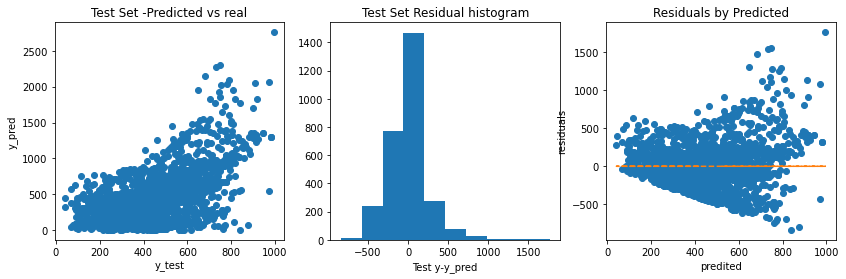

In [54]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [55]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

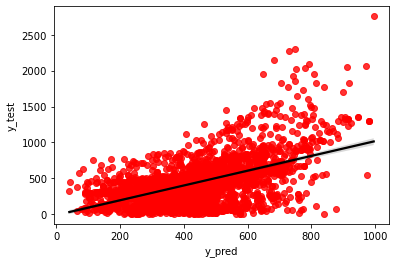

In [56]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [57]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE: ' )
R2=r2_score(y_test,y_pred)
print(R2)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)


MSE test:  62136.76565433906
MAE test:  171.3914196490399
MSE train:  55550.056468366696
RMSE: 
0.3169318472070254
R2_test:  0.3169318472070254
R2_train:  0.32975310901946797
MSE train - MSE test:  -6586.709185972366
R2_test/R2_train:  0.9611186021852317
Adj_R2: 0.31527448947061265


## Add categoricals to model

In [58]:
col_names_object

['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [59]:
categoricals_features

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [60]:
## add one-hot encoded, drop cat

df = df.drop(col_names_object, axis=1)


In [61]:
df[categoricals_features.columns] = categoricals_features
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6668\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[categoricals_features.columns] = categoricals_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6668\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[categoricals_features.columns] = categoricals_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6668\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

,Unnamed: 0,number_of_open_complaints,number_of_policies,total_claim_amount,months_since_last_claim_transformed,months_since_policy_inception_transformed,monthly_premium_auto_transformed,income_transformed,customer_lifetime_value_transformed,region_east,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
1,1,0,1,744,-1.132898,-0.624145,-1.250242,-0.794461,-2.351750,0,...,0,1,0,0,0,0,0,0,1,0
2,2,0,2,480,1.968165,-0.464007,0.393847,-1.150034,1.239030,1,...,0,1,0,0,0,0,1,0,1,0
3,3,0,2,484,-0.334851,-1.817968,0.329548,-0.027837,1.674186,0,...,1,0,0,0,0,0,0,0,1,0
4,4,1,7,707,0.062770,-0.464007,0.993800,-1.018358,0.681761,0,...,1,0,0,0,0,0,0,0,1,0
8,8,0,1,739,1.705570,-0.683178,1.606755,0.494888,0.051110,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,10683,0,2,897,-0.013801,-0.434861,1.824556,0.175587,1.495861,0,...,1,0,0,0,1,0,0,0,1,0
10684,10684,2,7,1214,-0.492137,-0.211070,2.583110,0.439976,1.288971,0,...,0,0,1,1,0,0,0,0,1,0
10685,10685,0,6,273,-0.590949,0.567211,-1.081940,0.323079,-0.196025,0,...,1,0,0,0,0,0,0,0,1,0
10686,10686,0,2,381,-0.248427,0.423855,2.119668,-0.282602,1.751677,0,...,0,0,1,0,1,0,0,0,1,0


In [62]:
X=df.drop('total_claim_amount', axis=1)
y=df['total_claim_amount']
#X=X.drop(['Unnamed: 0', 'monthly_premium_auto_transformed'], axis = 1)
list(X.columns)

['Unnamed: 0',
 'number_of_open_complaints',
 'number_of_policies',
 'months_since_last_claim_transformed',
 'months_since_policy_inception_transformed',
 'monthly_premium_auto_transformed',
 'income_transformed',
 'customer_lifetime_value_transformed',
 'region_east',
 'region_north west',
 'region_west region',
 'response_yes',
 'coverage_extended',
 'coverage_premium',
 'education_college',
 'education_doctor',
 'education_high school or below',
 'education_master',
 'effective_to_date_1/10/11',
 'effective_to_date_1/11/11',
 'effective_to_date_1/12/11',
 'effective_to_date_1/13/11',
 'effective_to_date_1/14/11',
 'effective_to_date_1/15/11',
 'effective_to_date_1/16/11',
 'effective_to_date_1/17/11',
 'effective_to_date_1/18/11',
 'effective_to_date_1/19/11',
 'effective_to_date_1/2/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/21/11',
 'effective_to_date_1/22/11',
 'effective_to_date_1/23/11',
 'effective_to_date_1/24/11',
 'effective_to_date_1/25/11',
 'effective_to_da

In [63]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [64]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [65]:
X_train.shape

(6749, 109)

In [66]:
X_test_scaled=std_scaler.transform(X_test)

In [67]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 1.63573174 -0.42107637 -0.8254333  ... -0.5000463   0.64549722
  -0.48797689]
 [-1.34129794 -0.42107637 -0.8254333  ...  1.99981481  0.64549722
  -0.48797689]
 [-1.21014841 -0.42107637 -0.8254333  ... -0.5000463   0.64549722
  -0.48797689]
 ...
 [ 0.13591091 -0.42107637 -0.8254333  ...  1.99981481 -1.54919334
   2.04927737]
 [-1.24923485 -0.42107637 -0.40882776 ... -0.5000463   0.64549722
  -0.48797689]
 [-0.4523238  -0.42107637 -0.8254333  ... -0.5000463   0.64549722
  -0.48797689]]
--------
[[-0.90294841 -0.42107637  1.25759442 ... -0.5000463   0.64549722
  -0.48797689]
 [ 1.04168252  4.99608799  0.00777779 ... -0.5000463  -1.54919334
   2.04927737]
 [-0.27659635 -0.42107637 -0.40882776 ... -0.5000463  -1.54919334
   2.04927737]
 ...
 [-0.83252822 -0.42107637 -0.8254333  ... -0.5000463   0.64549722
  -0.48797689]
 [ 0.387227    3.91265512  1.25759442 ... -0.5000463   0.64549722
  -0.48797689]
 [-1.16266324 -0.42107637 -0.8254333  ... -0.5000463   0.64549722
  -0.48797689]]


In [68]:
## add transformed columns, drop untransformed

In [69]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     191.8
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        15:31:36   Log-Likelihood:                -43064.
No. Observations:                6749   AIC:                         8.634e+04
Df Residuals:                    6642   BIC:                         8.707e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        439.4172      1.753    250.672      0.0

In [70]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [71]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

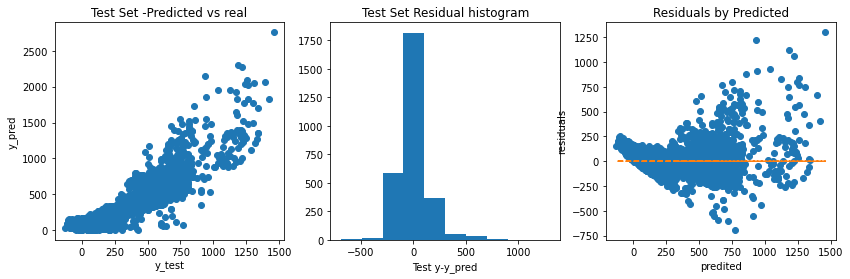

In [72]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [73]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

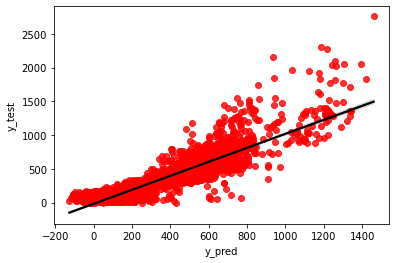

In [74]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [75]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
R2=r2_score(y_test,y_pred)
print(R2)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  23211.599281643423
MAE test:  102.97911891794392
MSE train:  20409.88083788874
0.7448353792200362
R2_test:  0.7448353792200362
R2_train:  0.753741759296536
MSE train - MSE test:  -2801.718443754682
R2_test/R2_train:  0.9881837778434724
Adj_R2: 0.7348415079785644


## Feature importance

In [76]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

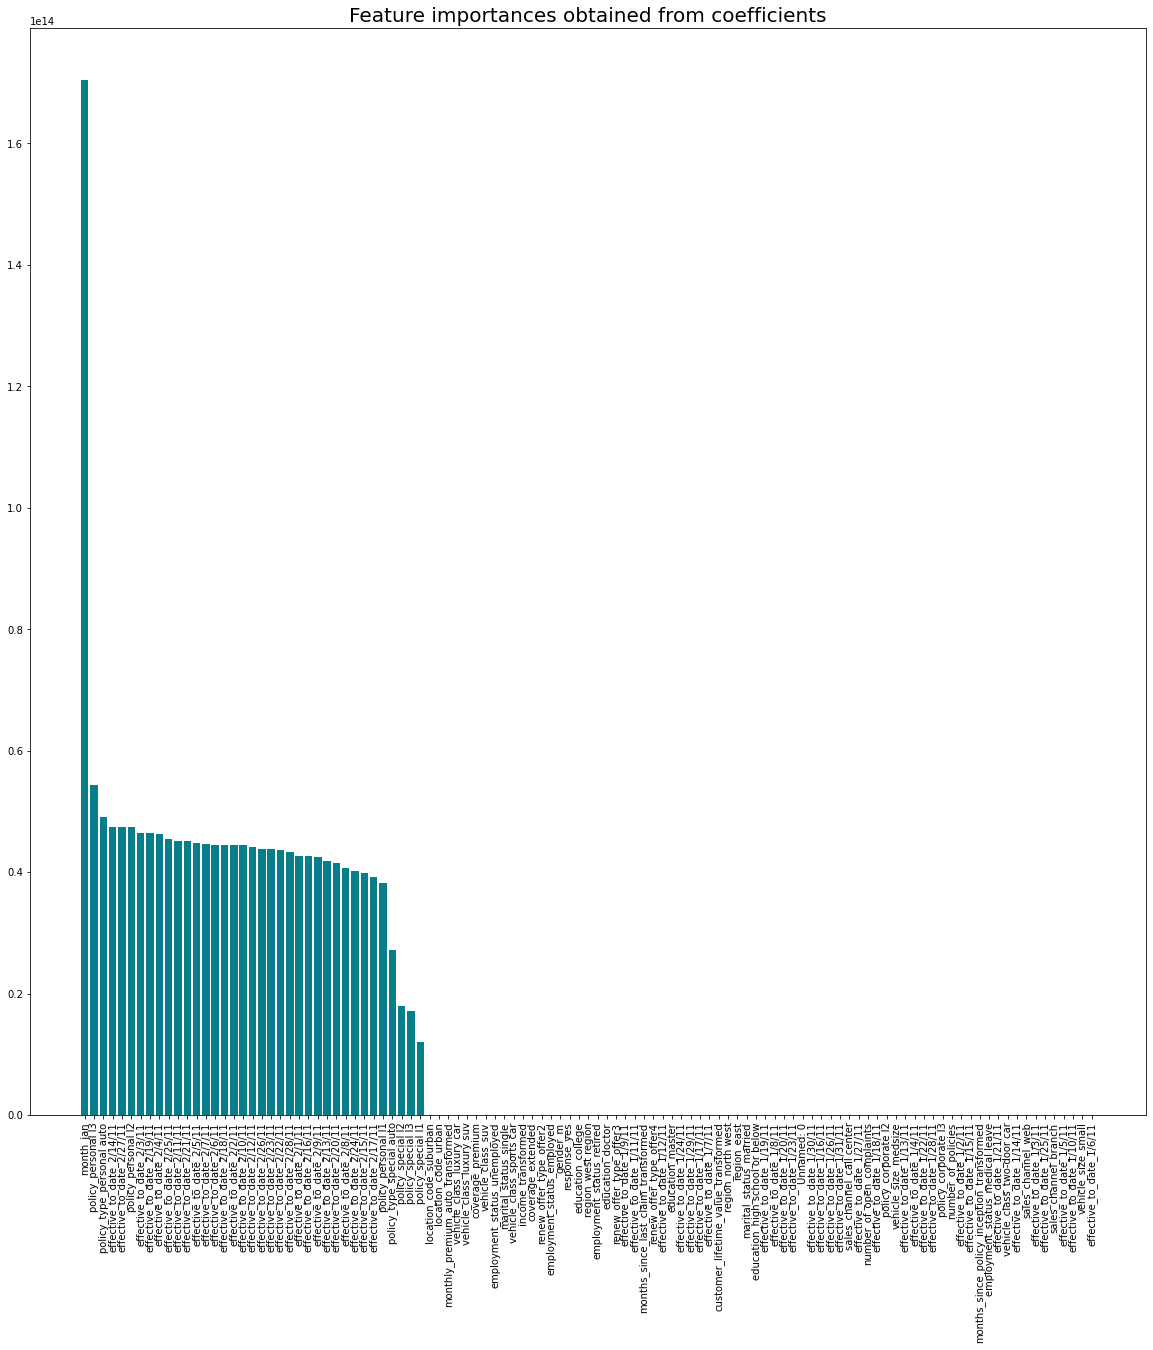

In [77]:
plt.figure(figsize=(20, 20))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')

plt.show()

## Trying to drop variables to get better AIC

In [78]:
# Running RFE with the output number of the variable equal to 9

rfe = RFE(model)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)
print(X_train.columns.size)

print(X_train.columns[rfe.support_].size)

[False False False False False  True False False False False False False
  True  True False False False False False  True False False False False
 False False False False False  True False False False False False  True
 False False  True False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
 False  True  True  True False False  True  True  True  True  True  True
 False False False False False False  True  True  True  True False False
 False]
[56 44 53 37 49  1 18 41 29 30 28  5  1  1 11  6 32 10 54  1  3  7 43 34
 21 13 25 14 33  1 42 31 22  4 45  1 27  8  1 46 16 26 24 48 51  9 15  2
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 40  1  1 12  1  1 35  1  1  1 23 39  1  1  1  1  1  1
 17 19 20 52 36 50  1  1  1  1 47 38 55]
10

## Linear regression dropping columns that are not important form AIC optimization

In [79]:
list(X.columns[rfe.support_])

X=df.drop('total_claim_amount', axis=1)
y=df['total_claim_amount']
X=X[list(X.columns[rfe.support_])]
list(X.columns)


['monthly_premium_auto_transformed',
 'coverage_extended',
 'coverage_premium',
 'effective_to_date_1/11/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/26/11',
 'effective_to_date_1/29/11',
 'effective_to_date_2/1/11',
 'effective_to_date_2/10/11',
 'effective_to_date_2/11/11',
 'effective_to_date_2/12/11',
 'effective_to_date_2/13/11',
 'effective_to_date_2/14/11',
 'effective_to_date_2/15/11',
 'effective_to_date_2/16/11',
 'effective_to_date_2/17/11',
 'effective_to_date_2/18/11',
 'effective_to_date_2/19/11',
 'effective_to_date_2/2/11',
 'effective_to_date_2/20/11',
 'effective_to_date_2/21/11',
 'effective_to_date_2/22/11',
 'effective_to_date_2/23/11',
 'effective_to_date_2/24/11',
 'effective_to_date_2/25/11',
 'effective_to_date_2/26/11',
 'effective_to_date_2/27/11',
 'effective_to_date_2/28/11',
 'effective_to_date_2/3/11',
 'effective_to_date_2/4/11',
 'effective_to_date_2/5/11',
 'effective_to_date_2/6/11',
 'effective_to_date_2/7/11',
 'effective_to_date_2/8/11'

In [80]:
X

,monthly_premium_auto_transformed,coverage_extended,coverage_premium,effective_to_date_1/11/11,effective_to_date_1/20/11,effective_to_date_1/26/11,effective_to_date_1/29/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,...,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv
1,-1.250242,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.393847,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0.329548,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.993800,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1.606755,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,1.824556,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
10684,2.583110,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
10685,-1.081940,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10686,2.119668,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### splitting, scalling using minmax

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
minmax_scaler=MinMaxScaler().fit(X_train)
X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)


In [82]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     393.0
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        15:31:41   Log-Likelihood:                -43121.
No. Observations:                6749   AIC:                         8.635e+04
Df Residuals:                    6697   BIC:                         8.670e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        439.4172      1.761    249.585      0.0

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     393.0
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        15:31:41   Log-Likelihood:                -43121.
No. Observations:                6749   AIC:                         8.635e+04
Df Residuals:                    6697   BIC:                         8.670e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        439.4172      1.761    249.585      0.000     435.966     442.869
x1            78.8461      4.175     18.887      0.000      70.662      87.030
x2            10.9166      2.489      4.387      0.000       6.038      15.795
x3            37.7160      2.557     14.749      0.000      32.703      42.729
x4            -2.8363      1.781     -1.592      0.111      -6.328       0.655
x5             3.8474      1.781      2.160      0.031       0.355       7.339
x6             3.2384      1.787      1.812      0.070      -0.265       6.742
x7             4.1566      1.787      2.327      0.020       0.654       7.659
x8            -0.6848      1.728     -0.396      0.692      -4.071       2.702
x9             2.4541      1.726      1.422      0.155      -0.930       5.838
x10           -0.9606      1.722     -0.558      0.577      -4.335       2.414
x11            0.7562      1.725      0.438      0.661      -2.625       4.137
x12            3.9086      1.729      2.260      0.024       0.519       7.298
x13           -1.9314      1.719     -1.124      0.261      -5.301       1.438
x14            0.0445      1.733      0.026      0.980      -3.353       3.442
x15            0.7804      1.727      0.452      0.651      -2.606       4.166
x16            0.7636      1.736      0.440      0.660      -2.640       4.167
x17            0.6469      1.724      0.375      0.708      -2.733       4.027
x18            0.3465      1.723      0.201      0.841      -3.030       3.723
x19            0.4090      1.724      0.237      0.812      -2.970       3.788
x20            2.7201      1.729      1.574      0.116      -0.669       6.109
x21            1.2394      1.724      0.719      0.472      -2.140       4.619
x22            2.8003      1.729      1.619      0.105      -0.590       6.190
x23           -1.7787      1.726     -1.030      0.303      -5.163       1.605
x24           -3.9861      1.732     -2.301      0.021      -7.382      -0.590
x25            2.1614      1.724      1.253      0.210      -1.219       5.542
x26           -3.4388      1.725     -1.993      0.046      -6.821      -0.056
x27            0.1806      1.721      0.105      0.916      -3.193       3.554
x28           -4.0985      1.727     -2.373      0.018      -7.485      -0.712
x29           -1.0322      1.720     -0.600      0.549      -4.405       2.340
x30            1.0502      1.721      0.610      0.542      -2.323       4.423
x31            0.0462      1.724      0.027      0.979      -3.333       3.426
x32           -0.4686      1.724     -0.272      0.786      -3.848       2.910
x33           -0.1600      1.725     -0.093      0.926      -3.541       3.222
x34            1.1259      1.731      0.650      0.515      -2.267       4.519
x35           -3.6889      1.731     -2.131      0.033      -7.081      -0.296
x3

MSE test:  23387.28099226846
MAE test:  102.89637328527412
MSE train:  20758.50497278574
0.7429041138847319
R2_test:  0.7429041138847319
R2_train:  0.7495353865691103
MSE train - MSE test:  -2628.7760194827206
R2_test/R2_train:  0.9911528223974425
Adj_R2: 0.7380122259882469


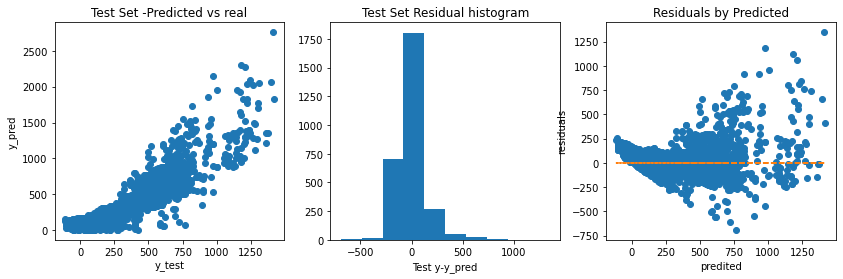

In [84]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
R2=r2_score(y_test,y_pred)
print(R2)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

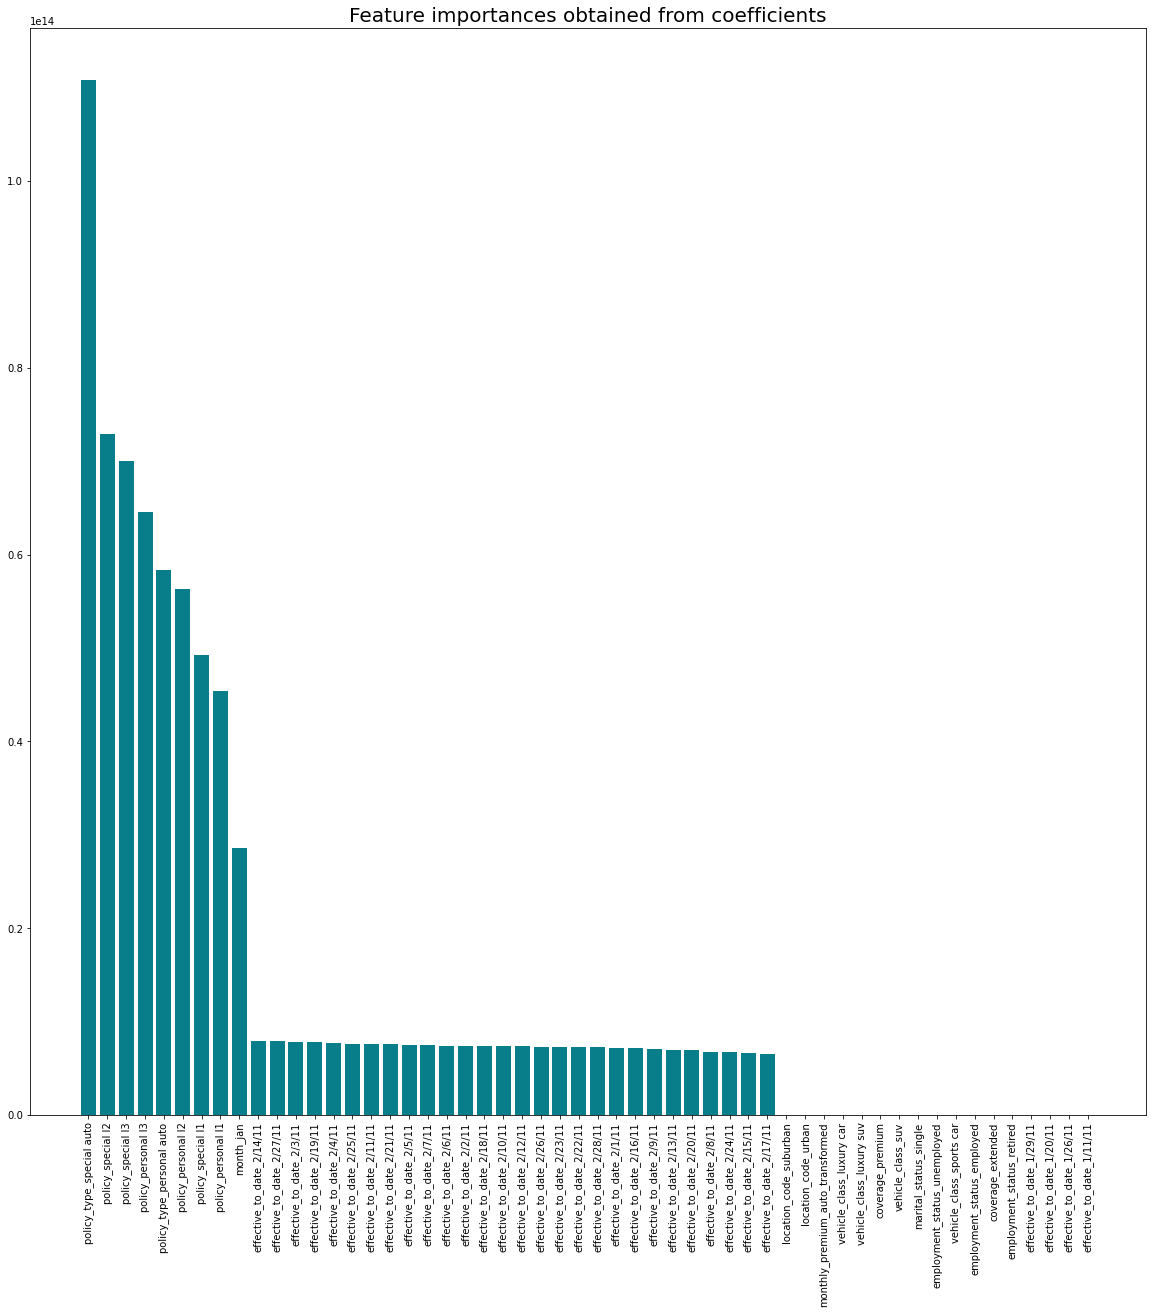

In [85]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 20))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')

plt.show()

## QT, Maxmin, Outliers: Boxplot

MSE test:  20776.82917943051

MAE test:  101.05867872807018

MSE train:  20253.474745677973

0.73329419948565

R2_test:  0.73329419948565

R2_train:  0.7468469074948152

MSE train - MSE test:  -523.3544337525382

R2_test/R2_train:  0.981853432245404

Adj_R2: 0.727556534361641

## QT, Std_Scaler, Outliers: Boxplot

MSE test:  20772.118570852694

MAE test:  101.0292845091657

MSE train:  20253.78031227344

0.7333546681269816

R2_test:  0.7333546681269816

R2_train:  0.7468430881438357

MSE train - MSE test:  -518.3382585792533

R2_test/R2_train:  0.9819394190948764

Adj_R2: 0.727618303870122

In [98]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet, LinearRegression
list_of_models = [Lasso, Ridge, ElasticNet]

In [104]:
def apply_model(list_of_models, X_train, y_train, alpha):
    for model in list_of_models:
        model = model(alpha)
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
    return

In [117]:
apply_model(list_of_models, X_train, y_train, alpha)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6668\727290839.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.005e+07, tolerance: 5.594e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_

Lasso: Train -> 0.7495350462387451, Test -> 0.7428912352808761
Ridge: Train -> 0.7495348346743214, Test -> 0.7429009890369118


C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.005e+07, tolerance: 5.594e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet: Train -> 0.7495350462387451, Test -> 0.7428912352808761
Lasso: Train -> 0.7332605007886195, Test -> 0.7288415410724696
Ridge: Train -> 0.7494708640038686, Test -> 0.7429549247771088
ElasticNet: Train -> 0.37944459559257715, Test -> 0.3710228846268325
Lasso: Train -> 0.7083444419395241, Test -> 0.7018684582175497
Ridge: Train -> 0.7492994715503789, Test -> 0.742898438794245
ElasticNet: Train -> 0.25895026804315724, Test -> 0.25173383474065203
Lasso: Train -> 0.6853757376136629, Test -> 0.6767922490857331
Ridge: Train -> 0.7490466673512608, Test -> 0.742749287388662
ElasticNet: Train -> 0.19501076697500375, Test -> 0.1890413540194752
Lasso: Train -> 0.6717277370686803, Test -> 0.6620060108647894
Ridge: Train -> 0.74873203409115, Test -> 0.7425284797652655
ElasticNet: Train -> 0.15548431352519498, Test -> 0.15046354851585264
Lasso: Train -> 0.6566975210909533, Test -> 0.6458701961951385
Ridge: Train -> 0.7483705450712634, Test -> 0.7422521878471868
ElasticNet: Train -> 0.12865

In [118]:
from sklearn.feature_selection import RFE

In [122]:
lm = LinearRegression()
selector =RFE(lm, n_features_to_select = 8, step = 1, verbose = 1)
selector.fit(X_train, y_train)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 fe

RFE(estimator=LinearRegression(), n_features_to_select=8, verbose=1)

In [124]:
kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)
X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Final selected features: 


,effective_to_date_2/15/11,effective_to_date_2/24/11,effective_to_date_2/26/11,effective_to_date_2/3/11,policy_type_personal auto,policy_personal l1,policy_personal l2,policy_personal l3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6744,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6745,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6746,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
kept_features

['effective_to_date_2/15/11',
 'effective_to_date_2/24/11',
 'effective_to_date_2/26/11',
 'effective_to_date_2/3/11',
 'policy_type_personal auto',
 'policy_personal l1',
 'policy_personal l2',
 'policy_personal l3']

In [133]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features


X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()


selector = VarianceThreshold(threshold=0.0000001) # Default threshold value is 0
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final number of numerical columns: ",X_train.shape)
print()
X_train

Initial number of numerical columns:  (6749, 8)

Final number of numerical columns:  (6749, 8)



,effective_to_date_2/15/11,effective_to_date_2/24/11,effective_to_date_2/26/11,effective_to_date_2/3/11,policy_type_personal auto,policy_personal l1,policy_personal l2,policy_personal l3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6744,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6745,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6746,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
